GAMMA CORRECTİON

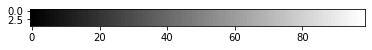

In [1]:
import skimage as io
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float
import numpy as np


im = np.array([np.arange(1,100),np.arange(1,100),np.arange(1,100),np.arange(1,100),np.arange(1,100)])
plt.imshow(im,cmap="gray")

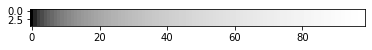

In [2]:
imcontrast_W = exposure.adjust_gamma(im,0.01)
plt.imshow(imcontrast_W,cmap="gray")
plt.show()

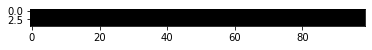

In [3]:
imcontrast_b = exposure.adjust_gamma(im,1.3)
plt.imshow(imcontrast_b,cmap="gray")
plt.show()


# Convolve önemli


Eğer filtre katsayıları simetrik ise corelation ve convolution aynıdır. Farklı ise convlotution  y eksenine göre ve x eksenine göre simetriğini alır ve o şekilde işlem uygular

In [4]:
# 1 2 3 | 3 2 1
# 4 5 6 | 6 5 4
# 7 8 9 | 9 8 7
#       ________
#       #  9 8 7 #
#       #  6 5 4 #
#       #  3 2 1 #

In [5]:
def lowpass(xx):
    box=[]
    finalbox=[]
    for i in range(len(xx)-2):
        for j in range(len(xx[0])-2):
            q=xx[i][j]
            w=xx[i][j+1]
            e=xx[i][j+2]
            a=xx[i+1][j]
            s=xx[i+1][j+1]
            d=xx[i+1][j+2]
            z=xx[i+2][j]
            x=xx[i+2][j+1]
            c=xx[i+2][j+2]
            bb=(q+w+e+a+s+d+z+x+c)/9
            box.append(bb)
            if j==len(xx[0])-3:
                finalbox.append(box)
                box=[]
    return finalbox

def weightlowpass(xx):
    box=[]
    finalbox=[]
    for i in range(len(xx)-2):
        for j in range(len(xx[0])-2):
            q=xx[i][j]
            w=xx[i][j+1]*2
            e=xx[i][j+2]
            a=xx[i+1][j]*2
            s=xx[i+1][j+1]*4
            d=xx[i+1][j+2]*2
            z=xx[i+2][j]
            x=xx[i+2][j+1]*2
            c=xx[i+2][j+2]
            bb=(q+w+e+a+s+d+z+x+c)/16
            box.append(bb)
            if j==len(xx[0])-3:
                finalbox.append(box)
                box=[]
    return finalbox

In [6]:
# EXAMPLE

ex = np.array([[1,3,2,5,7],[0,1,1,2,6],[1,2,2,3,4],[1,3,4,5,6],[2,5,6,6,7]])

weightlowpass(ex)

[[1.375, 1.9375, 3.3125], [1.75, 2.4375, 3.4375], [2.9375, 4.0, 4.8125]]

In [7]:
import scipy.ndimage as ndi
weight = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
ndi.convolve(ex,weight)

array([[1, 1, 2, 4, 6],
       [0, 1, 1, 3, 5],
       [1, 1, 2, 3, 4],
       [1, 2, 4, 4, 5],
       [2, 4, 5, 5, 6]])

# medyan filter
özelliği kenarları koruyor

In [38]:
nonlinmat = np.array([[9,8,7,6],[8,7,13,5],[7,6,5,4],[6,1,4,3]])
neighborhood = np.array([[1,1,1],[1,1,1],[1,1,1]])

median = filters.rank.median(nonlinmat, neighborhood)
median

array([[8, 8, 7, 7],
       [8, 7, 6, 6],
       [7, 6, 5, 5],
       [6, 6, 4, 4]], dtype=uint8)

In [14]:
maen = filters.rank.mean(nonlinmat, neighborhood)
maen

array([[8, 8, 7, 7],
       [7, 7, 6, 6],
       [5, 6, 5, 5],
       [5, 4, 3, 4]], dtype=uint8)

In [17]:
def laplacian(xx):
    box=[]
    finalbox=[]
    for i in range(len(xx)-2):
        for j in range(len(xx[0])-2):
            q=xx[i][j]*0
            w=xx[i][j+1]
            e=xx[i][j+2]*0
            a=xx[i+1][j]
            s=xx[i+1][j+1]*4
            d=xx[i+1][j+2]
            z=xx[i+2][j]*0
            x=xx[i+2][j+1]
            c=xx[i+2][j+2]*0
            bb=q+w+e+a+s+d+z+x+c
            box.append(bb)
            if j==len(xx[0])-3:
                finalbox.append(box)
                box=[]
    return finalbox

g(x,y) = f(x,y) + c[laplacian f(x,y)] merkez negatifse c negatif

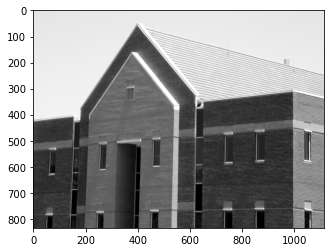

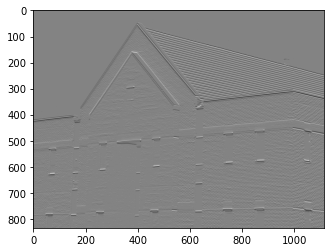

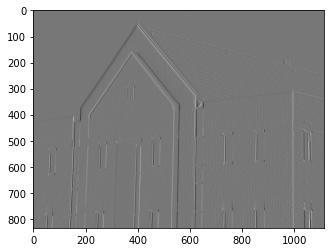

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import scipy.ndimage as ndi

image = io.imread('TestImages/building.tif')
plt.imshow(image,cmap='gray')

horizontal_kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
gradient_horizontal = ndi.convolve(image.astype(float),
                                horizontal_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_horizontal,cmap='gray');

vertical_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

gradient_vertical = ndi.convolve(image.astype(float),
                                vertical_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_vertical,cmap='gray');

####  LOG FİLTER

görüntüde kenar (edge detection) yapmadan önce smoothing uygulanmalı, gürültüler kenar olarak algılanabilir

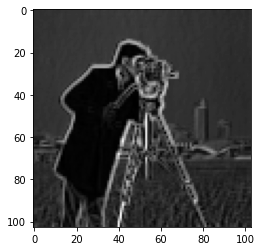

In [19]:
import numpy as np
import scipy.ndimage as ndi
from matplotlib import pyplot as plt
from skimage import data

image = data.camera()
pixelated = image[::5, ::5]



vertical_kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

horizontal_kernel = np.array([
    [1, 1, -1],
    [1, 0, -1],
    [1, 0, -1]
])

gradient_vertical = ndi.convolve(pixelated.astype(float),
                                 vertical_kernel)

gradient_horizontal = ndi.convolve(pixelated.astype(float),
                                 horizontal_kernel)

newimage = np.sqrt(np.square(gradient_vertical)+np.square(gradient_horizontal))

plt.imshow(newimage,cmap="gray")

## beyaz yerler kenar

# Thresholding gonzales


In [20]:
flow = np.array([[76,90,90,90,82],
                 [90,82,90,80,82],
                 [101,113,103,120,103],
                 [165,176,171,186,186],
                [200,194,200,203,200]])
mina = flow.min()
maxa = flow.max()

T = (mina + maxa)/2

minarray = flow[flow<T]
maxarray = flow[flow>=T]


mina = minarray.mean()
maxa = maxarray.mean()

T = (mina + maxa)/2
T

140.45

Bimodal gonzalesin yaptığı algoritmanın mod değerine göre yapılması 

In [21]:
from skimage.filters import threshold_minimum
from skimage import data

image = data.camera()

thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[False False  True False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]
 [False False False False False]]


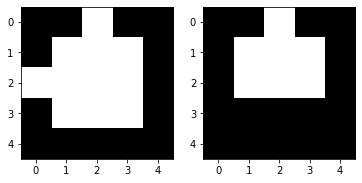

In [22]:
# Erosion shrinks bright regions
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import square, binary_dilation, binary_erosion
bright_square = np.array([[0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0],
                           [1, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

tool = np.array([[0,0,0],
                 [0,1,0],
                 [0,1,0]])
imgErosion= binary_erosion(bright_square, tool)
print(square(3))

plt.subplot(1, 2, 1)
plt.imshow(bright_square, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imgErosion, cmap='gray')
print(imgErosion)

In [23]:
lowpass(bright_square)

[[0.6666666666666666, 0.7777777777777778, 0.5555555555555556],
 [0.7777777777777778, 1.0, 0.6666666666666666],
 [0.5555555555555556, 0.6666666666666666, 0.4444444444444444]]

# Scale


In [24]:
from skimage import data
from skimage.transform import rescale

imm = data.camera()
reimm = rescale(imm,0.1)

# Rotate

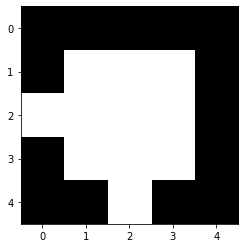

In [25]:
from skimage.transform import rotate


sqra = np.array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

rotateim = rotate(sqra,90)
plt.imshow(rotateim,cmap="gray")

In [26]:
# x'  =  | x*cos(Q) - y*sin(Q) |
# y'  =  | x*sin(Q) + y*cos(Q) |
# 1   =  |        1            |

# 2D Transformations

In [27]:
def Scaling(x,k=1):
    return k*x

kk=np.array([1,2,3])
Scaling(kk,2)


def Rotation(x,y,Q,s=1):
    xnew = x*np.cos(Q)-y*np.sin(Q)
    ynew = x*np.sin(Q)+y*np.cos(Q)
    mat = np.array([[xnew],
                    [ynew],
                    [s]])
    return mat

def Translation(x,y,dx,dy,s=1):
    x+=dx
    y+=dy
    mat = np.array([[x],[y],[s]])
    return mat

def oneinput_Scaling(s=1):
    mat = np.array([[s,0,0],
                   [0,s,0],
                   [0,0,1]])
    return mat

def oneinput_Translation(dx,dy,s=1):
    mat = np.array([[1,0,dx],
                   [0,1,dy],
                   [0,0,s]])
    return mat

def oneinput_Rotation(Q,s=1):
    mat = np.array([[np.cos(Q),-np.sin(Q),0],
                   [np.sin(Q),np.cos(Q),0],
                   [0,0,1]])
    return mat



In [28]:
rot = oneinput_Translation(5,8).dot(oneinput_Rotation(np.pi/2)).dot(oneinput_Translation(-5,-8))

In [29]:
rot.dot(np.array([[5],[8],[1]])) #[[5],[8],[1]] noktası baz alınarak 90 derece döndürme

array([[5.],
       [8.],
       [1.]])

In [30]:
rot.dot(np.array([[6],[8],[1]]))

array([[5.],
       [9.],
       [1.]])

In [31]:
rot.dot(np.array([[5],[9],[1]]))

array([[4.],
       [8.],
       [1.]])

# HİST OF GRADİENT

<ipython-input-32-9af143ae13cc>:21: RuntimeWarning: divide by zero encountered in true_divide
  orientation = np.arctan(yaa/xaa)
<ipython-input-32-9af143ae13cc>:21: RuntimeWarning: invalid value encountered in true_divide
  orientation = np.arctan(yaa/xaa)


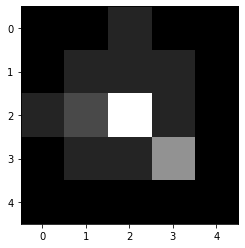

In [32]:
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

sqra = np.array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 2, 7, 1, 0],
       [0, 1, 1, 4, 0],
       [0, 0, 0, 0, 0]])

xderfilter = np.array([[-1],[0],[1]])

yderfilter = np.array([[-1,0,1]])

xaa = ndi.convolve(sqra,xderfilter)
yaa = ndi.convolve(sqra,yderfilter)

magnitude = np.sqrt(np.square(xaa)+np.square(yaa))

plt.imshow(sqra,cmap="gray")

orientation = np.arctan(yaa/xaa)

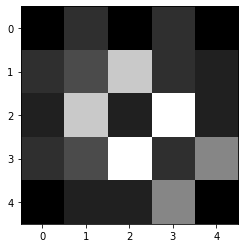

In [33]:
plt.imshow(magnitude,cmap="gray")

In [34]:
def convlayer(R,C,F,S=1,P=0):
    """
    R=ROW
    C=Column
    F=Filtre boyutu
    S=Stride (atlama)
    p=padding (0 ekleme)
    
    """
    R = ((R-F+2*P)/S) + 1
    C = ((C-F+2*P)/S) + 1
    #çıkış R X C X filtre sayısı
    return R,C

#EX
convlayer(227,227,11,S=4,P=0)


(55.0, 55.0)

In [35]:
ndi.convolve(np.array([4,5,12,4,4]))

TypeError: convolve() missing 1 required positional argument: 'weights'

In [ ]:
def parameters(F,D,FN):
    """
    F=filtrenin uzunluğu/genişliği
    D=filtrenin boyutu
    FN=uygulanan farklı filtre sayısı
    """
    eachparam = F*F*D+1
    Toplam = FN * eachparam
    print("her filtrenin {} parametresi var, toplam paramtere sayısı {}".format(eachparam,Toplam))

parameters(5,3,10)

In [ ]:
from scipy.special import softmax

ex3 = np.array([2.34,-0.6,3.1])
softmax(ex3)